In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


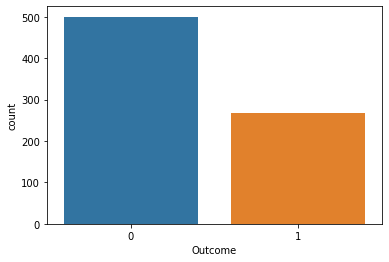

In [7]:
sns.countplot(df['Outcome'])
# There is class imbalance but it is not extreme and we do not have to worry about it

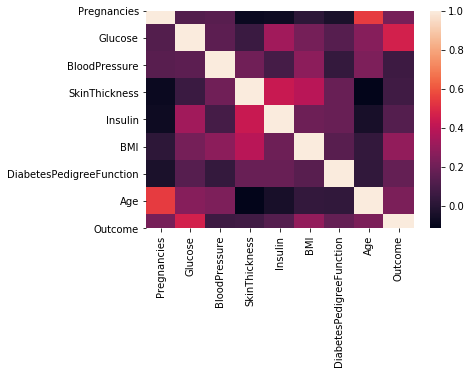

In [8]:
sns.heatmap(df.corr())

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [10]:
X = df.drop('Outcome', axis= 1)
y = df['Outcome']

In [11]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [13]:
scores = cross_val_score(DecisionTreeClassifier(), X_scaled, y, cv = 5 )

In [14]:
print(scores)

[0.68181818 0.68181818 0.66883117 0.78431373 0.7124183 ]


In [15]:
b_clf =  BaggingClassifier(
    base_estimator= DecisionTreeClassifier(),
    n_estimators= 100, 
    max_samples= 0.8, 
    oob_score= True, 
    random_state= 42
)

scores = cross_val_score(b_clf, X, y, cv = 5 )
print(scores)

[0.75974026 0.74675325 0.74675325 0.83660131 0.76470588]


In [16]:
scores.mean()

0.7709107885578474

In [17]:
b_clf.fit(X_train, y_train)
b_clf.oob_score_

0.7529182879377432

In [18]:
b_clf.score(X_test, y_test)

0.7440944881889764